# NLP EDA

Text Data Exploration Techniques

- [Term Frequency](#Term-Frequency)
- [Ngrams](#Ngrams)
- [Document Length](#Document-Length)
- [Word Cloud](#Word-Cloud)
- [Sentiment Analysis](#Sentiment-Analysis)

## Setup

In [2]:
from typing import List
import unicodedata
import re

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv("spam_clean.csv")

A quick data summary

In [3]:
df.shape

(5572, 2)

In [4]:
df.isna().sum()

label    0
text     0
dtype: int64

In [11]:
df.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


What percentage of the data is spam?

,n,percent
ham,4825,0.865937
spam,747,0.134063


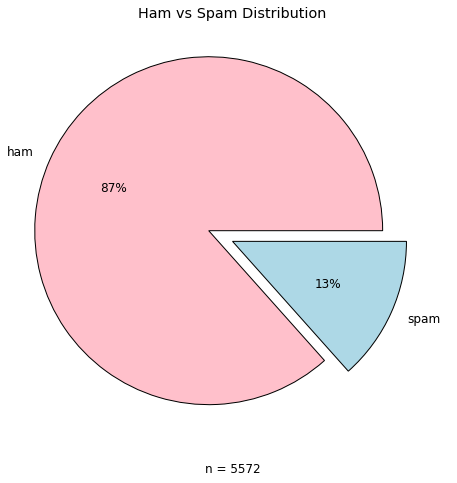

In [5]:
df.label.value_counts().plot.pie(
    colors=["pink", "lightblue"], explode=(0.15, 0), autopct="%.0f%%"
)
plt.title("Ham vs Spam Distribution")
plt.ylabel("")
plt.xlabel("n = %d" % df.shape[0])

pd.concat(
    [df.label.value_counts(), df.label.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)

## Term Frequency

In [6]:
pd.Series(" ".join(df.text).split()).value_counts()

to                       2134
you                      1622
I                        1466
a                        1327
the                      1197
and                       857
in                        798
is                        781
i                         742
u                         692
for                       644
my                        628
of                        591
your                      560
me                        557
on                        487
have                      474
2                         453
that                      421
are                       396
it                        396
call                      376
or                        373
be                        362
at                        359
with                      349
not                       340
will                      330
get                       326
can                       304
                         ... 
AccommodationVouchers       1
www.music-trivia.net        1
150p/msg, 

1. one big string for everything, spam, ham
1. lists of strings
1. list of strings -> pandas series so we can value count
1. combine series into single dataframe

In [7]:
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [17]:
pd.concat([pd.Series(all_text[:15]), pd.Series(spam_text[:15]), pd.Series(ham_text[:15])]).T.rename(columns={0: 'all', 1: 'spam', 2: 'ham'})

0    Go until jurong
0    Free entry in 2
0    Go until jurong
dtype: object

In [8]:
all_words = clean(all_text)
spam_words = clean(spam_text)
ham_words = clean(ham_text)

In [9]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [18]:
tf = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

- most common words overall?
- most common spam, ham words?
- any words that uniquely spam or ham?

In [19]:
tf.sort_values(by="all").tail(10)

,all,ham,spam
know,267,241,26
free,275,59,216
ok,277,272,5
dont,279,257,22
4,287,168,119
go,304,273,31
ur,384,240,144
get,397,314,83
im,462,449,13
call,600,241,359


Text(0.5, 1.0, 'What are the most common words in all texts?')

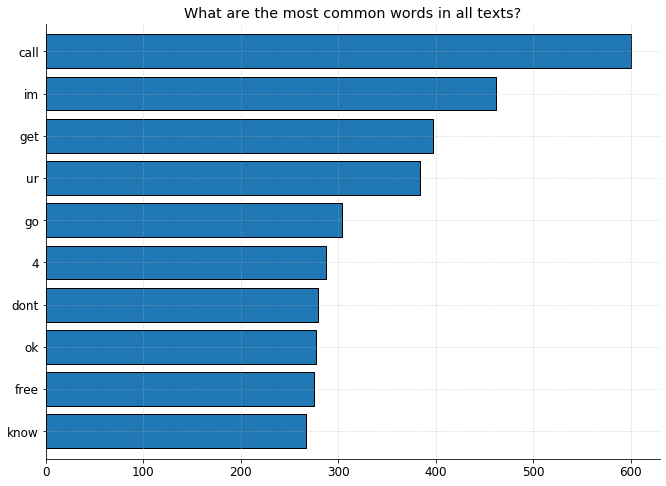

In [25]:
tf.sort_values(by='all')['all'].tail(10).plot.barh(width=.8)
plt.title('What are the most common words in all texts?')

Text(0.5, 1.0, 'What are the most common words in spam texts?')

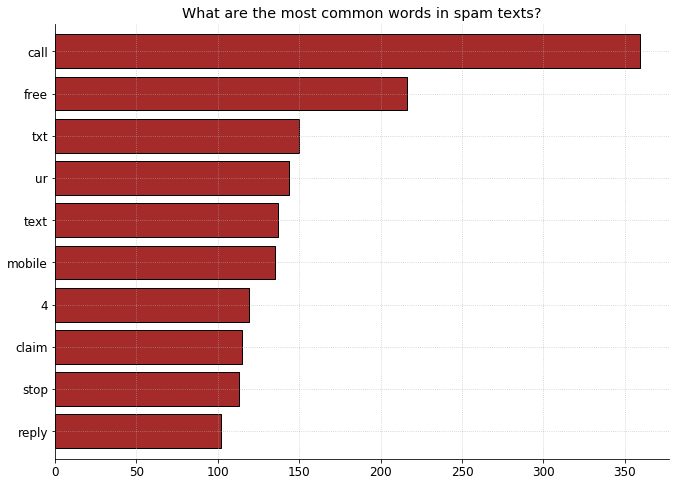

In [24]:
tf.sort_values(by='spam')['spam'].tail(10).plot.barh(width=.8, color='brown')
plt.title('What are the most common words in spam texts?')

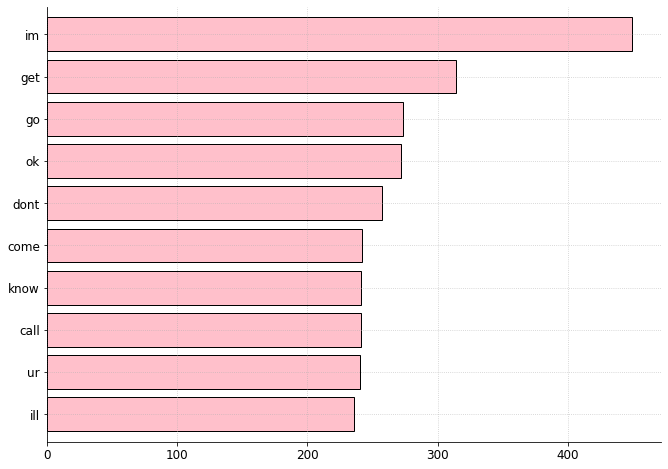

In [23]:
tf.sort_values(by='ham')['ham'].tail(10).plot.barh(width=.8, color='pink')
plt.title('What are the most common words in ham texts?')

## Ngrams

- bigrams + viz most frequent for all, spam, ham
- trigrams, etc

In [26]:
list(nltk.bigrams('I love the smell of regex in the morning'.split()))

[('I', 'love'),
 ('love', 'the'),
 ('the', 'smell'),
 ('smell', 'of'),
 ('of', 'regex'),
 ('regex', 'in'),
 ('in', 'the'),
 ('the', 'morning')]

In [28]:
list(nltk.ngrams('I love the smell of regex in the morning'.split(),3))

[('I', 'love', 'the'),
 ('love', 'the', 'smell'),
 ('the', 'smell', 'of'),
 ('smell', 'of', 'regex'),
 ('of', 'regex', 'in'),
 ('regex', 'in', 'the'),
 ('in', 'the', 'morning')]

In [29]:
pd.Series(nltk.bigrams(all_words)).value_counts()

(please, call)                                    53
(call, later)                                     52
(ill, call)                                       48
(let, know)                                       42
(sorry, ill)                                      39
(dont, know)                                      38
(new, year)                                       32
(good, morning)                                   31
(customer, service)                               29
(take, care)                                      26
(po, box)                                         25
(im, going)                                       24
(a1000, cash)                                     23
(guaranteed, call)                                23
(prize, guaranteed)                               22
(pls, send)                                       22
(ok, lor)                                         22
(every, week)                                     21
(4, ur)                                       

Text(0.5, 1.0, 'What are the most common bigrams in all texts?')

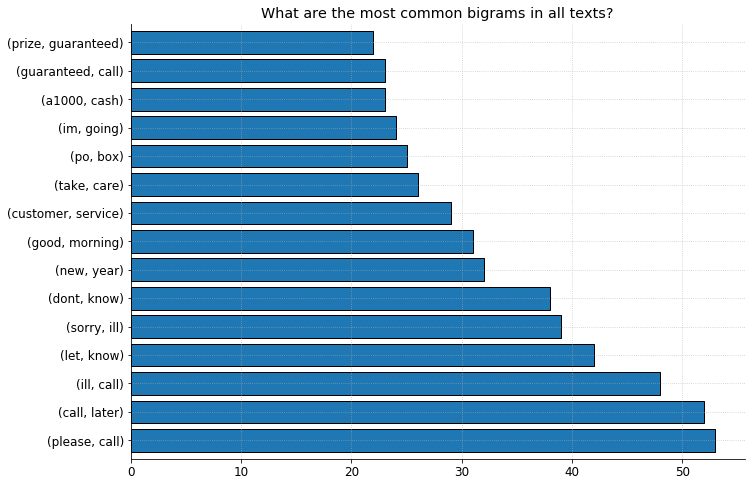

In [30]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.8)
plt.title('What are the most common bigrams in all texts?')

Text(0.5, 1.0, 'What are the most common bigrams in spam texts?')

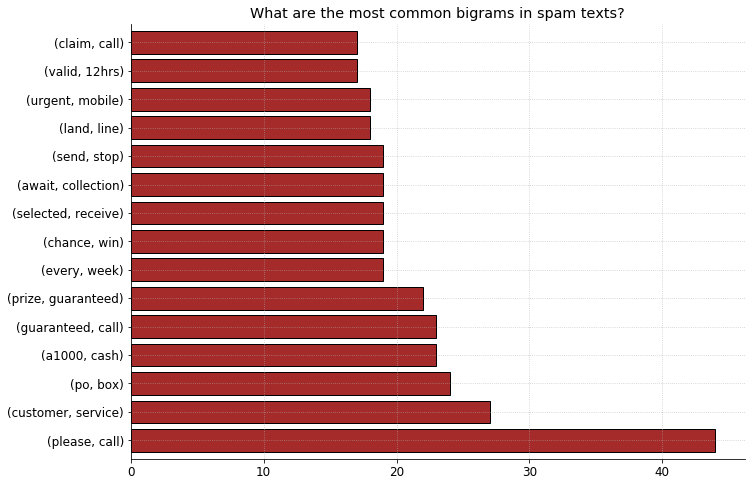

In [32]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(width=.8, color='brown')
plt.title('What are the most common bigrams in spam texts?')

Text(0.5, 1.0, 'What are the most common bigrams in ham texts?')

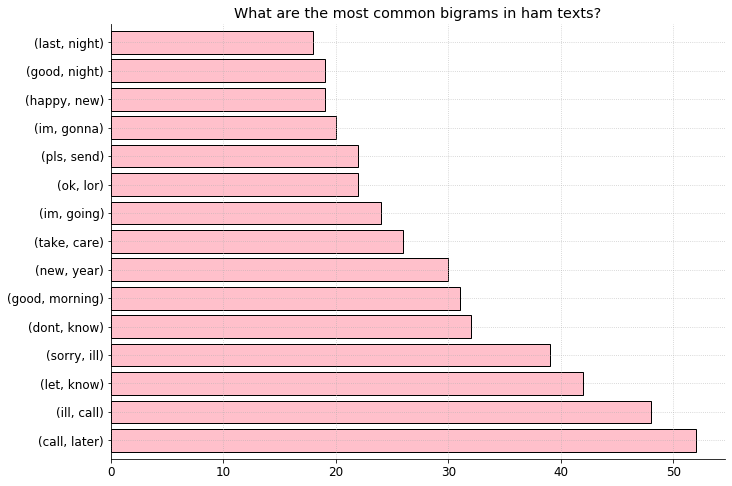

In [37]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(width=.8, color='pink')
plt.title('What are the most common bigrams in ham texts?')

Text(0.5, 1.0, 'What are the most common trigrams in all texts?')

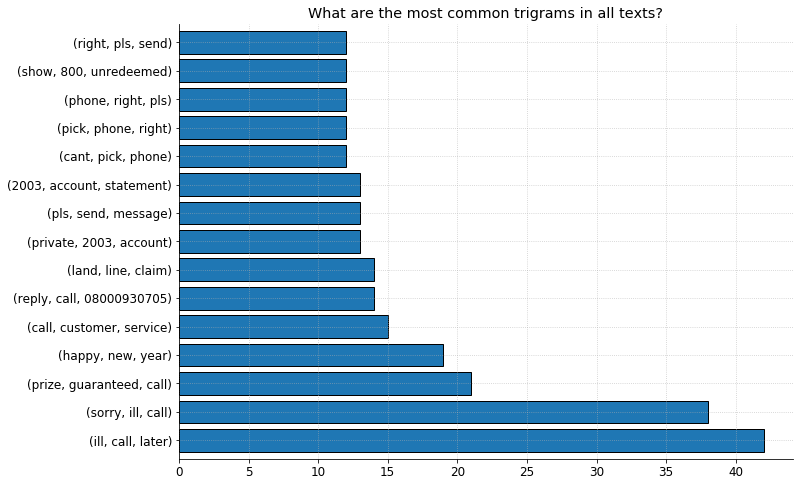

In [42]:
pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(15).plot.barh(width=.8)
plt.title('What are the most common trigrams in all texts?')

Text(0.5, 1.0, 'What are the most common trigrams in spam texts?')

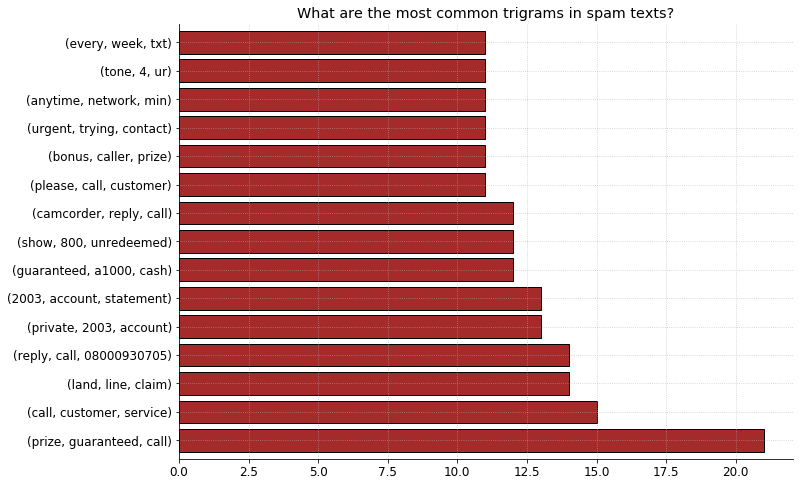

In [43]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(15).plot.barh(width=.8, color='brown')
plt.title('What are the most common trigrams in spam texts?')

Text(0.5, 1.0, 'What are the most common trigrams in ham texts?')

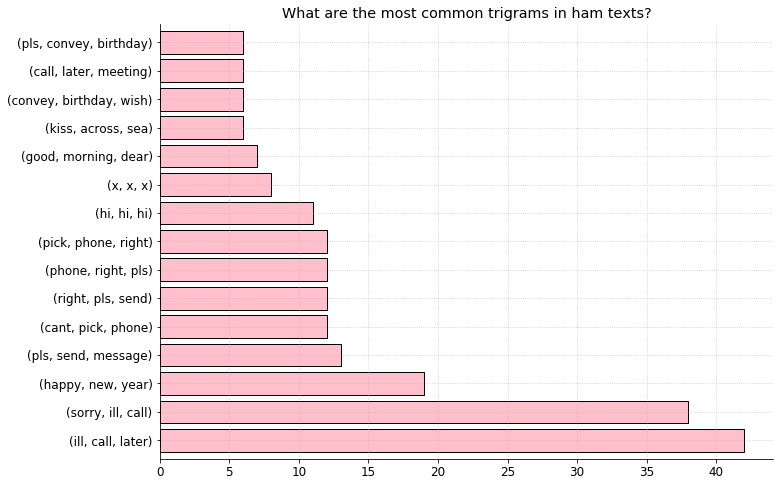

In [44]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(15).plot.barh(width=.8, color='pink')
plt.title('What are the most common trigrams in ham texts?')

## Document Length

In [39]:
df["message_length"] = df.text.apply(len)

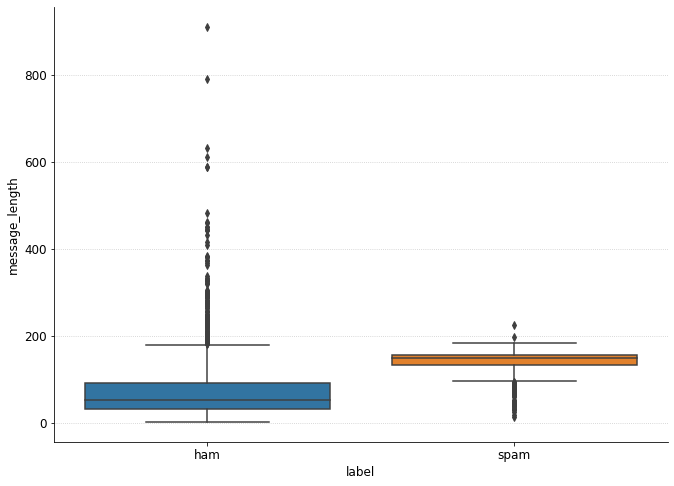

In [40]:
sns.boxplot(data=df, y="message_length", x="label")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fa05240>,
      dtype=object)

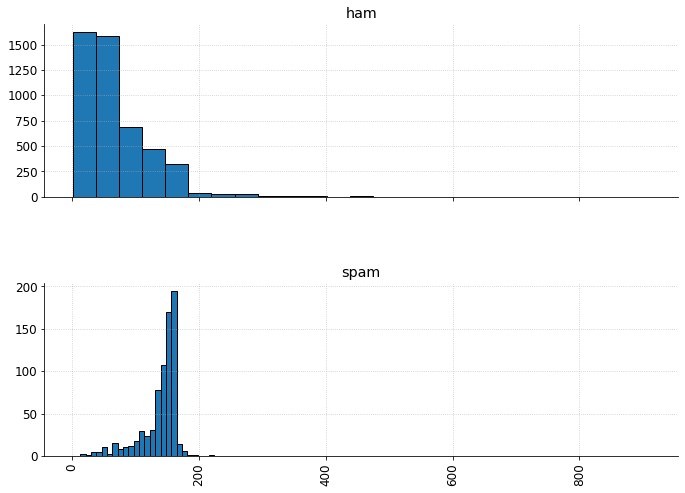

In [41]:
df.hist("message_length", by="label", sharex=True, layout=(2, 1), bins=25)

### Number of Words

In [45]:
df["n_words"] = df.text.str.count(r"\w+")

In [46]:
df.groupby("label").n_words.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,14.677098,11.738398,0.0,7.0,11.0,19.0,190.0
spam,747.0,25.821954,6.073204,2.0,24.0,27.0,30.0,40.0


Text(0.5, 0.98, 'Distribution of Number of Words for Spam and Ham Messages')

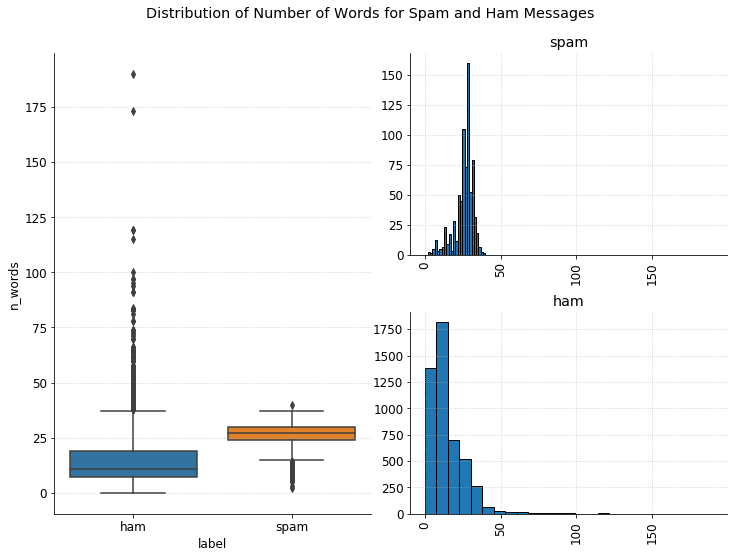

In [47]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.8])  # left, bottom, width, height
ax2 = fig.add_axes([0.55, 0.1, 0.4, 0.35])
ax3 = fig.add_axes([0.55, 0.55, 0.4, 0.35], sharex=ax2)
sns.boxplot(data=df, y="n_words", x="label", ax=ax1)
df.hist("n_words", by="label", bins=25, ax=[ax2, ax3])
fig.suptitle("Distribution of Number of Words for Spam and Ham Messages")

## Word Cloud

`WordCloud()` produces an image object, which can be displayed with `plt.imshow`

In [ ]:
from wordcloud import WordCloud

sentence = (
    "Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow."
)
img = WordCloud(background_color="white").generate(sentence)
plt.imshow(img)
plt.axis("off")

do the same with all words, spam and ham

In [ ]:
img = WordCloud(background_color="white").generate(all_text)
plt.imshow(img)
plt.axis("off")

In [ ]:
all_cloud = WordCloud(background_color="white", height=1000, width=400).generate(
    " ".join(all_words)
)
ham_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(ham_words)
)
spam_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(spam_words)
)

plt.figure(figsize=(10, 8))
axs = [
    plt.axes([0, 0, 0.5, 1]),
    plt.axes([0.5, 0.5, 0.5, 0.5]),
    plt.axes([0.5, 0, 0.5, 0.5]),
]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title("All Words")
axs[1].set_title("Ham")
axs[2].set_title("Spam")

for ax in axs:
    ax.axis("off")

### Word Cloud with Bigrams

- `generate_from_frequencies` + python gymnastics

In [ ]:
frequencies = {
    "Codeup": 10,
    "Bayes": 5,
    "Data Science": 6,
}

img = WordCloud(background_color="white").generate_from_frequencies(frequencies)
plt.figure(figsize=(9, 6))
plt.imshow(img)
plt.axis("off")

In [ ]:
top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(20)

data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}

img = WordCloud(
    background_color="white", width=800, height=400
).generate_from_frequencies(data)

plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis("off")

## Sentiment Analysis

A way for us to put a number to indicate whether a document has a positive or
negative sentiment.

### Vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("Sentiment analysis is very awesome!")

In [ ]:
sia.polarity_scores("I am pretty worried about bad weather this weekend.")

In [ ]:
df["vader_sentiment"] = df.text.apply(lambda txt: sia.polarity_scores(txt)["compound"])

In [ ]:
sns.boxplot(data=df, y="vader_sentiment", x="label")
df.groupby("label").vader_sentiment.describe()

### Afinn

In [ ]:
from afinn import Afinn

sa = Afinn()

In [ ]:
sa.score("Sentiment analysis is very awesome!")

In [ ]:
sa.score("I am pretty worried about bad weather this weekend.")

In [ ]:
df["afinn_sentiment"] = df.text.apply(sa.score)

In [ ]:
sns.boxplot(data=df, y="afinn_sentiment", x="label")
df.groupby("label").afinn_sentiment.describe()

## Further Reading

- [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment)
- [AFINN Sentiment Analysis](https://github.com/fnielsen/afinn)

## Other NLP Libraries

- [spaCy](https://spacy.io/)
- [textacy](https://chartbeat-labs.github.io/textacy/) builds on top of spaCy
- [TextBlob](https://textblob.readthedocs.io/en/dev/)

## Bonus Exercises

After you've worked through the exercises in the curriculum,

- Use sentiment analysis to explore your datasets. Which news category has the highest sentiment? Which has the lowest? Does this match with what you might predict?

- Create a feature named `has_long_words`. This should be either true or false depending on whether or not the message contains a word greater than 5 characters. Use this feature to explore spam v ham. What changes if you change the cutoff from 5 to 8 characters?

- Explore the enron spam email dataset

    Download [the json file located here](https://ds.codeup.com/enron_spam.json.gz) and read it with pandas:
    
    We have done a little preprocessing and acquisition of the [data found in this kaggle competition](https://www.kaggle.com/wanderfj/enron-spam) to make it easier to work with.
    
    ```python
    df = pd.read_json("enron_spam.json.gz")
    ```
    
    Start by focusing just on the `label`, `subject`, and `text` columns.